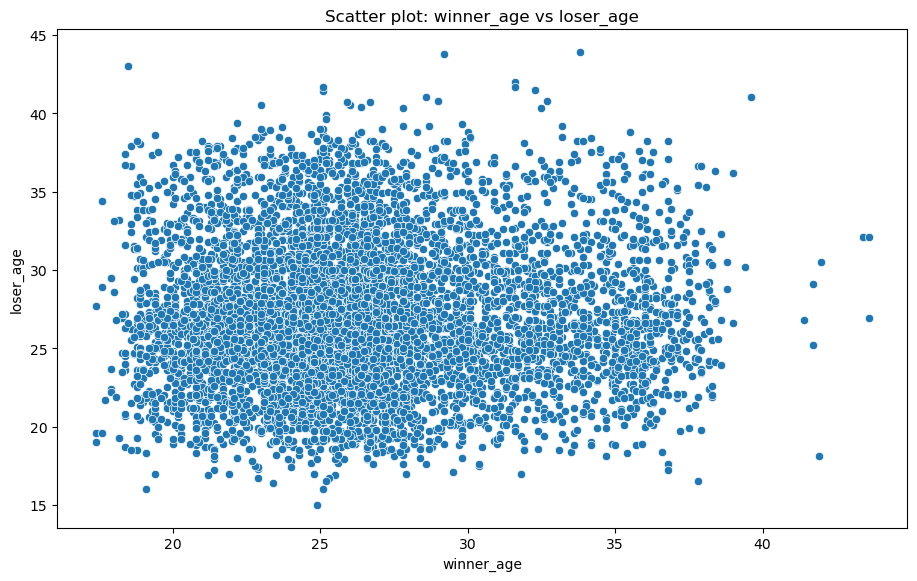

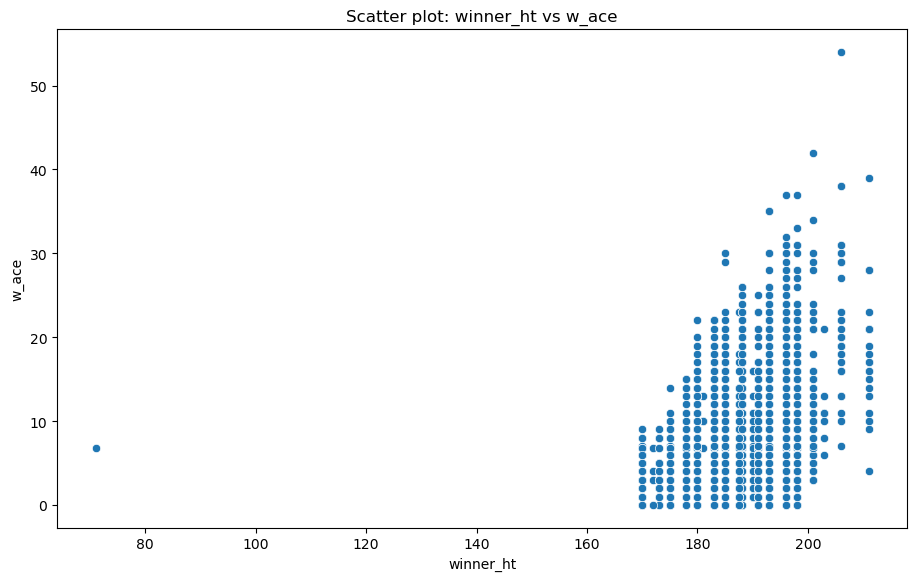

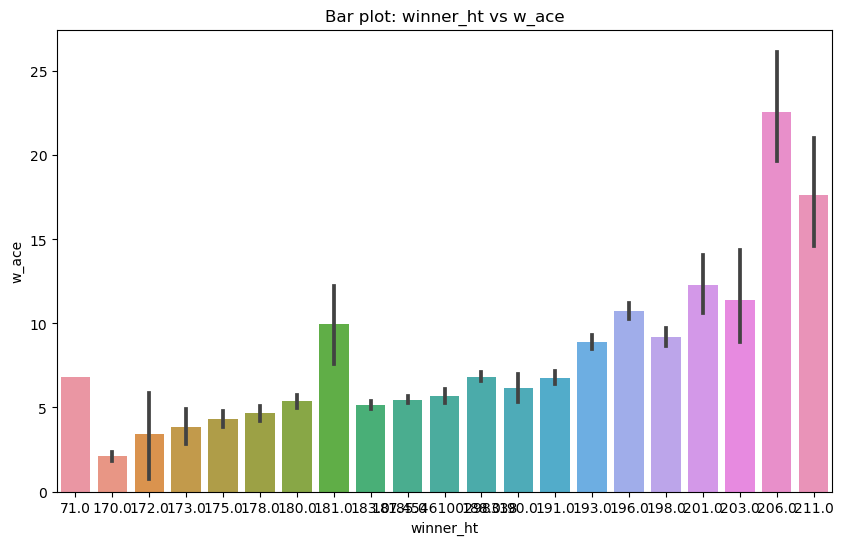

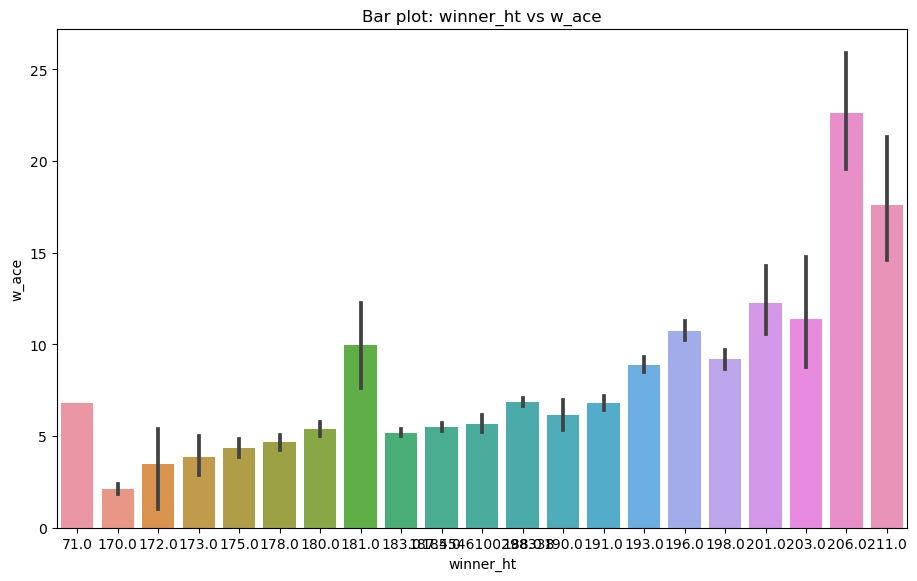

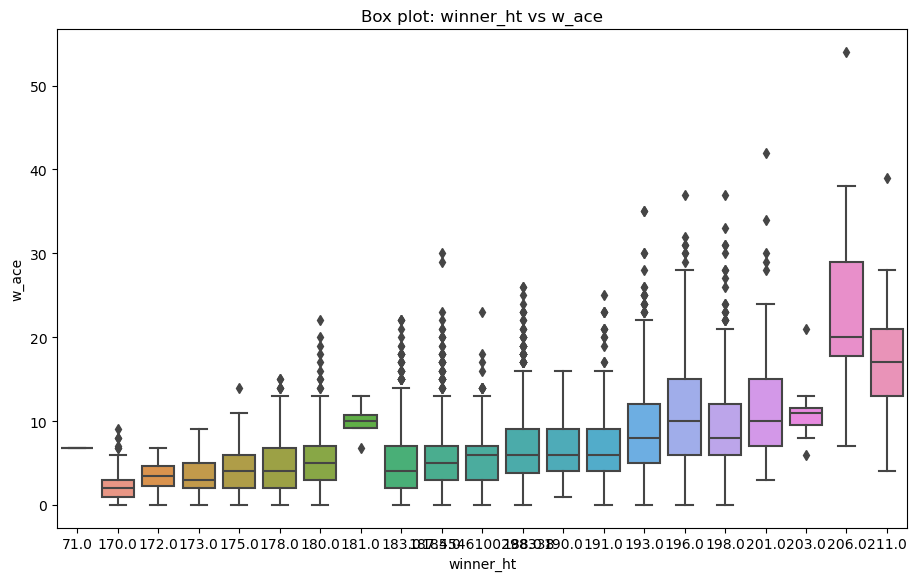

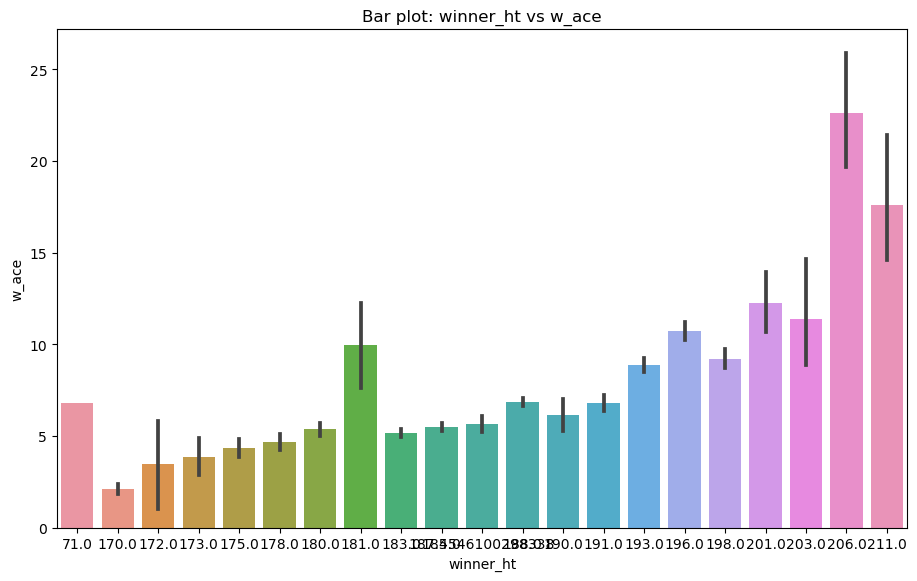

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from tkinter import ttk
import tkinter.messagebox as messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Charger les données
df = pd.read_csv('atp_matches_combined_cleaned.csv')

# Fonction pour créer le graphique
def create_plot():
    plot_type = plot_type_var.get()
    x_axis = x_axis_var.get()
    y_axis = y_axis_var.get()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    if plot_type == "Scatter":
        sns.scatterplot(data=df, x=x_axis, y=y_axis, ax=ax)
    elif plot_type == "Bar":
        sns.barplot(data=df, x=x_axis, y=y_axis, ax=ax)
    elif plot_type == "Box":
        sns.boxplot(data=df, x=x_axis, y=y_axis, ax=ax)
    
    ax.set_title(f"{plot_type} plot: {x_axis} vs {y_axis}")
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    
    return fig

# Fonction pour mettre à jour le graphique
def update_plot():
    for widget in plot_frame.winfo_children():
        widget.destroy()
    
    fig = create_plot()
    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=BOTH, expand=True)

# Fonction pour afficher les statistiques
def show_stats():
    selected_column = stats_var.get()
    stats = df[selected_column].describe()
    messagebox.showinfo("Statistics", f"Statistics for {selected_column}:\n\n{stats}")

# Créer la fenêtre principale
root = Tk()
root.title("Tennis Data Visualization")
root.geometry("1000x600")

# Créer les frames
control_frame = Frame(root)
control_frame.pack(side=LEFT, padx=10, pady=10)

plot_frame = Frame(root)
plot_frame.pack(side=RIGHT, expand=True, fill=BOTH, padx=10, pady=10)

# Variables pour les menus déroulants
plot_type_var = StringVar()
x_axis_var = StringVar()
y_axis_var = StringVar()
stats_var = StringVar()

# Menus déroulants
ttk.Label(control_frame, text="Plot Type:").pack()
plot_type_menu = ttk.Combobox(control_frame, textvariable=plot_type_var, values=["Scatter", "Bar", "Box"])
plot_type_menu.pack()
plot_type_menu.set("Scatter")

ttk.Label(control_frame, text="X-axis:").pack()
x_axis_menu = ttk.Combobox(control_frame, textvariable=x_axis_var, values=list(df.columns))
x_axis_menu.pack()
x_axis_menu.set("winner_age")

ttk.Label(control_frame, text="Y-axis:").pack()
y_axis_menu = ttk.Combobox(control_frame, textvariable=y_axis_var, values=list(df.columns))
y_axis_menu.pack()
y_axis_menu.set("loser_age")

# Bouton pour mettre à jour le graphique
update_button = ttk.Button(control_frame, text="Update Plot", command=update_plot)
update_button.pack(pady=10)

# Menu déroulant et bouton pour les statistiques
ttk.Label(control_frame, text="Statistics:").pack()
stats_menu = ttk.Combobox(control_frame, textvariable=stats_var, values=list(df.columns))
stats_menu.pack()
stats_menu.set("winner_age")

stats_button = ttk.Button(control_frame, text="Show Statistics", command=show_stats)
stats_button.pack(pady=10)

# Afficher le graphique initial
update_plot()

# Lancer l'application
root.mainloop()
